In [13]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming `df` is your dataset
df = pd.read_csv("/Users/s.vandanov/Documents/GitHub/classification-system-ekog/research/train.csv")
df = df.dropna(subset=['ID', 'LABEL'])

df = df.fillna(0)
df

,X_FROM,X_TO,LABEL,ID,AGE_MONTHS,EXPERIMENT_TYPE,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,...,DWT_Energy_Level_5_OcR,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR
0,65.0,74.0,swd,Ati4x3,9m,Xyl01(Pharm!),41.736788,115.921150,80.741924,22.575744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86.0,97.0,swd,Ati4x3,9m,Xyl01(Pharm!),78.885679,172.981258,106.916182,28.074434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102.0,106.0,swd,Ati4x3,9m,Xyl01(Pharm!),23.980034,55.922019,35.043307,10.074958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111.0,115.0,swd,Ati4x3,9m,Xyl01(Pharm!),23.685810,41.485386,28.798218,8.672198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,117.0,121.0,swd,Ati4x3,9m,Xyl01(Pharm!),22.536150,39.467002,28.776488,3.758832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,20080.0,20089.0,swd,Ati4x3,12m,BL,51.875772,148.515264,110.284638,33.662867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,20605.0,20614.0,swd,Ati4x3,12m,BL,54.413026,144.923011,103.074536,42.541546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,20631.0,20636.0,swd,Ati4x3,12m,BL,30.200842,68.234215,50.315813,21.313092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,20644.0,20649.0,swd,Ati4x3,12m,BL,26.370483,65.663622,65.724688,20.621628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

cat_features = ['AGE_MONTHS', 'EXPERIMENT_TYPE']

# Encode target labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])  # Transform 'ds', 'is', 'swd' into numeric

# Split features and target
X = df.drop(columns=['LABEL','ID', 'X_FROM', 'X_TO'])
y = df['LABEL']

# Initialize CatBoost classifier with categorical features
catboost_params = {
    'iterations': 100,
    # 'depth': 6,
    'loss_function': 'MultiClass'
}
catboost_model = CatBoostClassifier(**catboost_params)

# Cross-validation setup
data_pool = Pool(X, y, cat_features=cat_features)
cv_results = cv(
    params=catboost_params,
    pool=data_pool,
    fold_count=3,
    plot=True,
)

# Print CV results
print(cv_results)

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

# Train the model
catboost_model.fit(train_pool, verbose=100)

# Predict and evaluate
y_pred = catboost_model.predict(test_pool)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 1.0689283	test: 1.0704397	best: 1.0704397 (0)	total: 7.52ms	remaining: 744ms
1:	learn: 1.0432808	test: 1.0460877	best: 1.0460877 (1)	total: 11ms	remaining: 538ms
2:	learn: 1.0172268	test: 1.0208188	best: 1.0208188 (2)	total: 14.4ms	remaining: 466ms
3:	learn: 0.9939668	test: 0.9989024	best: 0.9989024 (3)	total: 18.5ms	remaining: 443ms
4:	learn: 0.9689411	test: 0.9735372	best: 0.9735372 (4)	total: 21.6ms	remaining: 410ms
5:	learn: 0.9472490	test: 0.9531270	best: 0.9531270 (5)	total: 25.4ms	remaining: 397ms
6:	learn: 0.9248779	test: 0.9300465	best: 0.9300465 (6)	total: 27.1ms	remaining: 360ms
7:	learn: 0.9003763	test: 0.9074657	best: 0.9074657 (7)	total: 30.2ms	remaining: 347ms
8:	learn: 0.8806813	test: 0.8896372	best: 0.8896372 (8)	total: 33.5ms	remaining: 338ms
9:	learn: 0.8613240	test: 0.8712165	best: 0.8712165 (9)	total: 35.9ms	remaining: 323ms
10:	learn: 0.8437158	test: 0.8528478	best: 0.8528478 (10)	total: 37.4ms	remaining: 302ms
11:	learn: 0.8259472

In [15]:
label_encoder.transform(y_pred)

/Users/s.vandanov/Documents/GitHub/classification-system-ekog/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 0])

In [17]:
# сформировать новую колонку
X_test['prediction'] = label_encoder.transform(y_pred)
X_test
# отдать это дане

/Users/s.vandanov/Documents/GitHub/classification-system-ekog/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,AGE_MONTHS,EXPERIMENT_TYPE,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,DWT_Energy_Level_5_FrL,DWT_Energy_Level_6_FrL,Delta_Power_FrL,Theta_Power_FrL,...,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR,prediction
1467,12m,BL,16.944500,54.784896,39.757938,12.246094,1.036218,0.014117,0.014744,0.030363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
70,9m,Xyl01(Pharm!),5.741374,7.691028,3.632959,0.671883,0.088342,0.001458,0.004912,0.003983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
131,9m,Xyl01(Pharm!),14.854989,37.965872,13.152216,2.922488,0.194694,0.002758,0.005673,0.012264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1074,14m,BL,107.242643,267.419159,239.837065,81.228025,6.739707,0.084286,0.015277,0.037576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1501,12m,BL,18.949739,84.408602,43.806683,7.012021,0.735960,0.010696,0.003300,0.026245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,9m,Xyl01(Pharm!),41.640533,30.097487,16.383950,3.459071,0.318786,0.004839,0.005519,0.005023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
75,9m,Xyl01(Pharm!),79.510902,83.619335,40.549630,16.468062,1.327762,0.019389,0.006399,0.005401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
671,15m,BL,33.629676,50.535708,26.407593,6.467633,0.562737,0.008235,0.003939,0.013979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1095,14m,BL,24.196946,65.895621,30.751284,8.014186,0.697091,0.010768,0.002412,0.009189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          ds       0.97      0.97      0.97        29
          is       1.00      1.00      1.00         9
         swd       0.99      0.99      0.99        76

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 640x480 with 0 Axes>

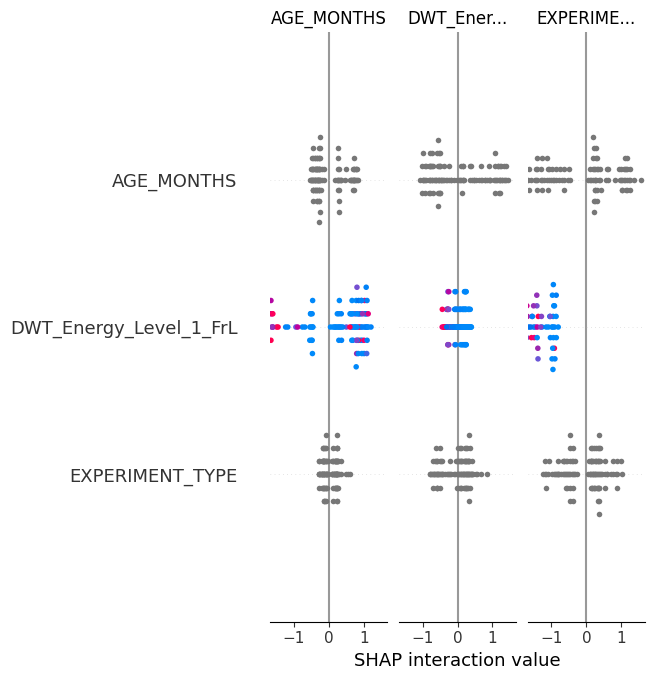

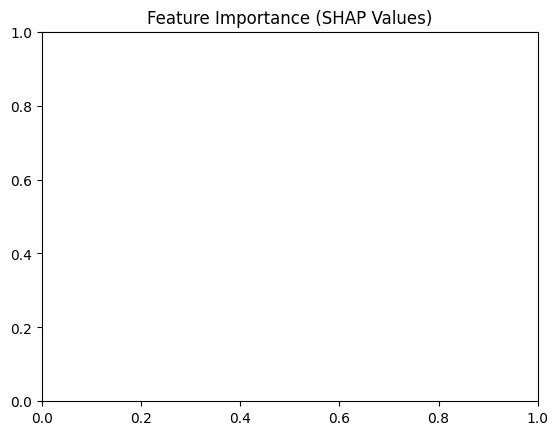

<Figure size 640x480 with 0 Axes>

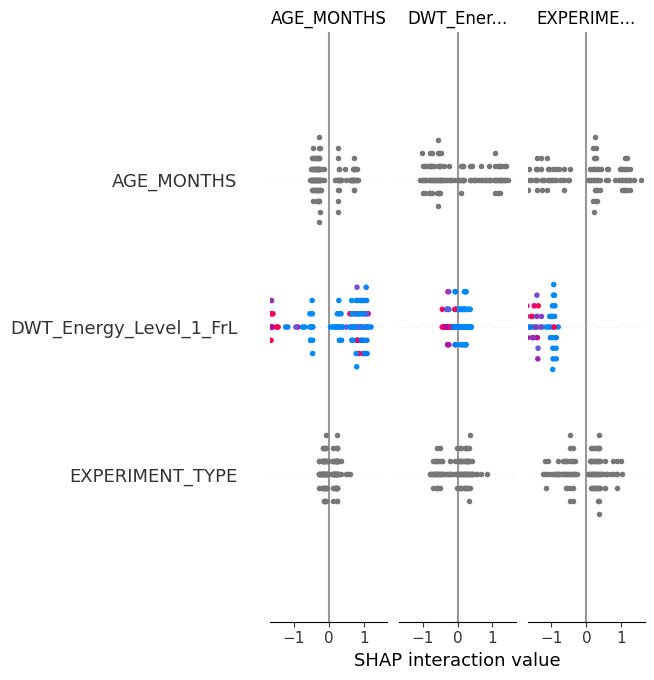

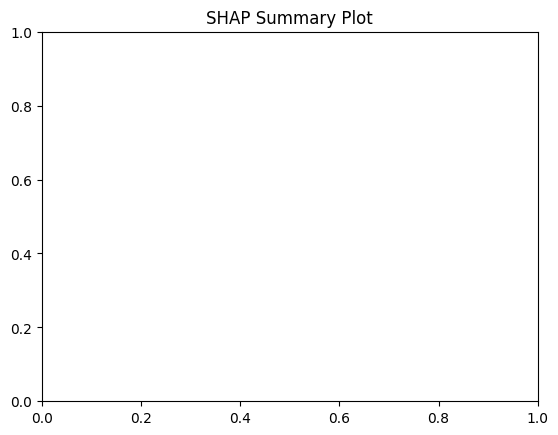

In [11]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP Feature Importance
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP Values)")
plt.show()

# SHAP Summary Plot (detailed)
plt.figure()
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot")
plt.show()

<Figure size 640x480 with 0 Axes>

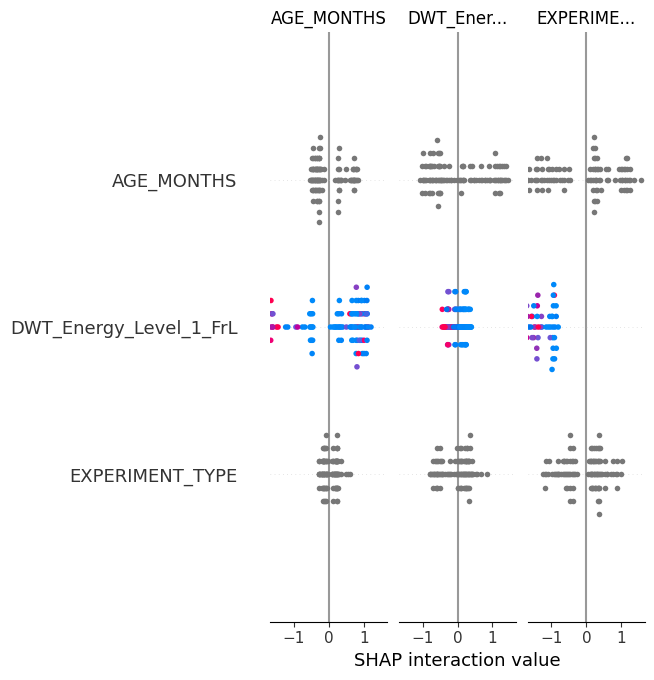

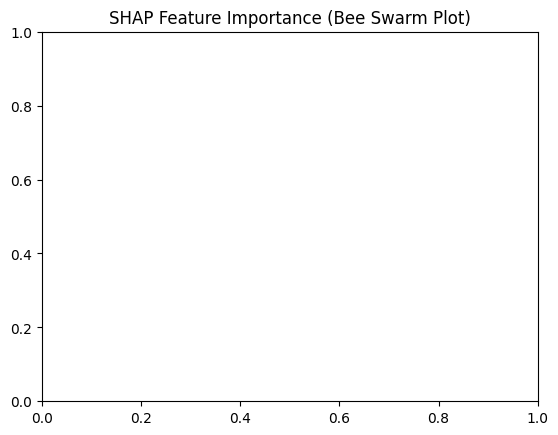

/var/folders/b6/hs82fhv10h35l3krx6tyhln00000gq/T/ipykernel_739/2226233469.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


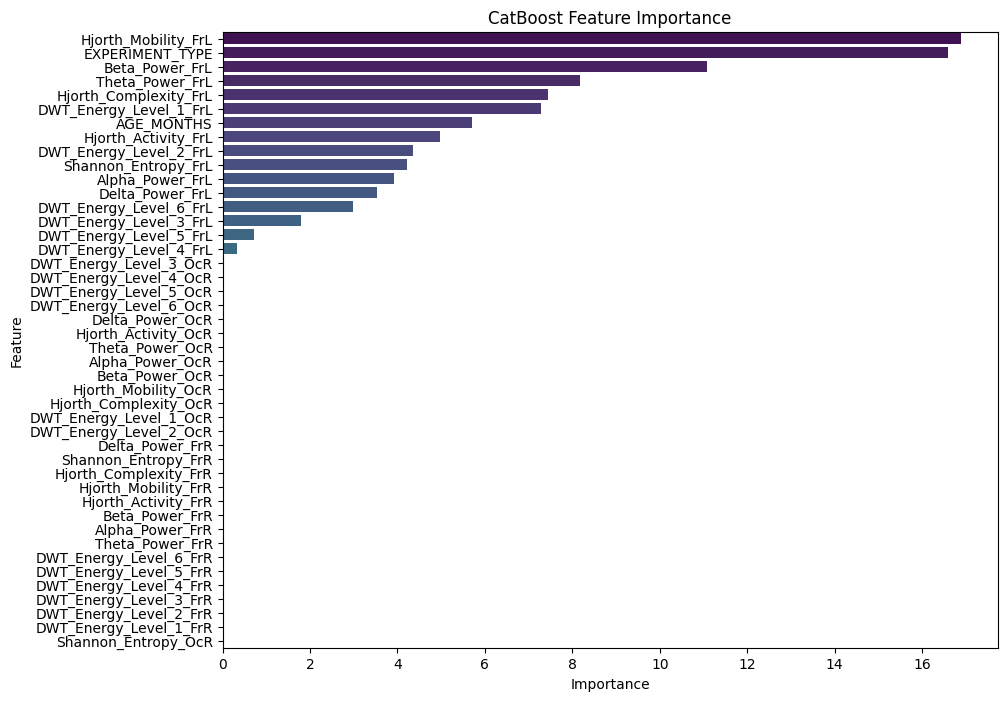

In [12]:

# SHAP Feature Importance (Bee Swarm Plot)
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (Bee Swarm)
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="dot")  # 'dot' for bee swarm
plt.title("SHAP Feature Importance (Bee Swarm Plot)")
plt.show()

# CatBoost Built-in Feature Importance
feature_importances = catboost_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot CatBoost Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()